#Klasifikasi Dokumen dengan LSTM

Created by: Muammar Khadafi

Dicoding username: muamkh

Jumlah sampel text : 2225

Jumlah class : 5

train acc : 0.9972

val acc : 0.9213

In [ ]:
pip install nltk

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2.5.0


In [ ]:
vocab_size = 4000
embedding_dim = 32
max_length = 231
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [ ]:
articles = []
labels = []

import requests

CSV_URL = 'https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv'


with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    reader = csv.reader(decoded_content.splitlines(), delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[2431, 1, 225, 1, 22, 641, 587, 225, 1, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1693, 1, 1721, 1, 1, 1, 1, 1, 1, 1, 1, 1, 122, 1, 1, 2, 2874, 1505, 352, 1, 1, 52, 341, 1, 352, 2171, 3962, 41, 22, 3794, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 1, 1, 365, 22, 1, 787, 2367, 1, 1, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 1, 1, 599, 1, 1693, 1021, 1, 1, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1606, 1, 543, 492, 1, 1444, 1, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1364, 6, 1, 2431, 565, 22, 2971, 1, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 1, 247]


In [ ]:
a=0
for i in range(len(train_sequences)):
  a+=len(train_sequences[i])
print(a/len(train_sequences))

230.79606741573033


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
231
192
231
186
231


In [ ]:
print(train_padded[10])

[2431    1  225    1   22  641  587  225    1    1    1 1662    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1144 1693    1 1721    1    1    1    1    1    1    1    1    1
  122    1    1    2 2874 1505  352    1    1   52  341    1  352 2171
 3962   41   22 3794    1    1    1    1  543    1    1    1  835  631
 2366  347    1    1  365   22    1  787 2367    1    1  138   10    1
 3665  682 3531    1   22    1  414  823  662    1   90   13  633    1
  225    1    1  599    1 1693 1021    1    1  807 1864  117    1    1
    1 2974   22    1   99  278    1 1606    1  543  492    1 1444    1
  778 1320    1 1861   10   33  641  319    1   62  478  565  301 1506
   22  479    1    1 1665    1  797    1 3066    1 1364    6    1 2431
  565   22 2971    1    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1506 1342  374   20   63
  883 1096    1  247    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 231)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti <OOV> film german movie anti <OOV> <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> director <OOV> <OOV> said feeling responsibility keep <OOV> <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police <OOV> <OOV> behind film <OOV> worked closely <OOV> <OOV> including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti <OOV> <OOV> summer <OOV> arrested dropped <OOV> <OOV> university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest <OOV> trial saw <OOV> initially <OOV> charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film entitled <

In [ ]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') <= 0.02):
            print()
            print("Training di stop karena loss sudah kurang dari 0.02")
            self.model.stop_training = True
callbacks = callBack()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          128000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 146,918
Trainable params: 146,918
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(set(labels))

{'business', 'entertainment', 'sport', 'politics', 'tech'}


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2, callbacks=[callbacks])

Epoch 1/20
56/56 - 12s - loss: 1.6689 - accuracy: 0.2539 - val_loss: 1.4199 - val_accuracy: 0.4652
Epoch 2/20
56/56 - 8s - loss: 1.1346 - accuracy: 0.5202 - val_loss: 0.9394 - val_accuracy: 0.6090
Epoch 3/20
56/56 - 8s - loss: 0.9074 - accuracy: 0.5500 - val_loss: 0.9259 - val_accuracy: 0.6831
Epoch 4/20
56/56 - 8s - loss: 0.6889 - accuracy: 0.7865 - val_loss: 0.6382 - val_accuracy: 0.8022
Epoch 5/20
56/56 - 8s - loss: 0.3510 - accuracy: 0.8966 - val_loss: 0.3607 - val_accuracy: 0.8742
Epoch 6/20
56/56 - 8s - loss: 0.1979 - accuracy: 0.9624 - val_loss: 0.3227 - val_accuracy: 0.9034
Epoch 7/20
56/56 - 8s - loss: 0.1047 - accuracy: 0.9809 - val_loss: 0.2910 - val_accuracy: 0.9034
Epoch 8/20
56/56 - 8s - loss: 0.0509 - accuracy: 0.9910 - val_loss: 0.3002 - val_accuracy: 0.9079
Epoch 9/20
56/56 - 8s - loss: 0.0231 - accuracy: 0.9983 - val_loss: 0.2906 - val_accuracy: 0.9124
Epoch 10/20
56/56 - 8s - loss: 0.0167 - accuracy: 0.9972 - val_loss: 0.2570 - val_accuracy: 0.9213

Training di stop 

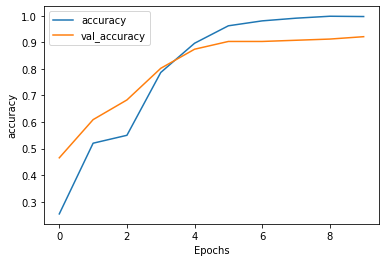

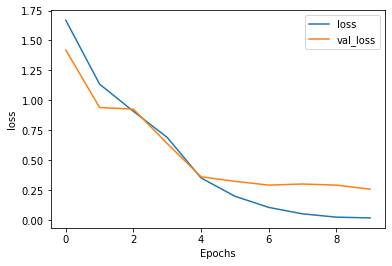

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")